# Stock Return

Submitted by: Prabin Raj Shrestha

<a href="https://colab.research.google.com/drive/1melicLF-bqpeOQ16yXq_3htS9JXrWLDb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install all required Packages

install.packages('PerformanceAnalytics', dependencies = TRUE)
install.packages('e1071', dependencies = TRUE)
install.packages('tseries', dependencies = TRUE)
install.packages('nortest', dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’




The rate of return an investor receives from buying a common stock and
holding it for a given period of time is equal to the cash dividends received
plus the capital gain (or minus the capital loss) during the holding period
divided by the purchase price of the security.

Denote by $D_t$ the asset’s dividend payment at date $t$ and assume, purely as a matter of convention, that this dividend is paid just before the date-$t$ price $P_t$ is recorded; **hence $P_t$ is taken to be the ex-dividend price at date $t$.**

Alternatively, one might describe $P_t$ as an end-of-period asset price, as shown in the below figure.
Then the net simple return at date t may be defined as,
$$
R_t = \frac{P_t + D_t}{P_{t-1}}-1
\quad\quad(2.1)
$$

The equations describe the calculation of gross returns over a specified period and how these returns can be annualized to make comparisons across different investment horizons.

1. **Gross Return over k periods**:

  This is the total compounded return from time $t - k$ to time $t$. The formula given is:

   $$
   R_t(k) = (1 + R_t)(1 + R_{t-1}) \ldots (1 + R_{t-k+1}) - 1 \equiv \prod_{j=0}^{k-1} (1 + R_{t-j}) - 1
   \quad\quad(2.2)
   $$

   Here, $R_t$ is the return at time $t$, and the product operator (\(\prod\)) multiplies the returns over the past $k$ periods.

2. **Annualized Return for Multiple Years**:
  
  Annualizing returns is essential for comparing investments with different time horizons. The formula for annualizing returns over multiple years, where $k = h \times 252$ (assuming 252 trading days per year), is:

   $$
   \text{Annualized } R_t(k = h \times 252) = \left(\prod_{j=0}^{k-1} (1 + R_{t-j})\right)^{\frac{1}{h}} - 1
   \quad\quad(2.3)
   $$

   Here, $h$ is the number of years, and $k$ is the number of trading days within these $h$ years. The term $\frac{1}{h}$ represents the annualization factor.

3. **Annualized Return over 252 Trading Days**:

  When daily returns are compounded over 252 trading days (one year), the annualized return is:

   $$
   \text{Annualized } R_t(252) = \prod_{j=0}^{251} (1 + R_{t-j}) - 1
   \quad\quad(2.4)
   $$

   This formula compounds daily returns to compute the annual return for a single year.

4. **Return over five-year investment**:

  To compute the return of a five-year investment horizon from daily returns $R_t$, one should follow the equation below:

  $$
  \text{Annualized } R_t(252 \times 5) = \left(\prod_{j=0}^{252 \times 5 - 1} (1 + R_{t-j})\right)^{\frac{1}{5}} - 1
   \quad\quad(2.5)
  $$

  Here, $k$ is the number of days in the past five years.

4. **Return over five-year investment**:

  To compute the return of a half-year investment horizon from daily returns $R_t$, one should follow the equation below:

  $$
  \text{Annualized } R_t\left(\frac{252}{2}\right) = \left(\prod_{j=0}^{\frac{252}{2} - 1} (1 + R_{t-j})\right)^{2} - 1
  \quad\quad(2.6)
  $$
   
  Here, $k$ is the number of days in the past half-year.

### Key Points:
- **Gross Return**: Measures the compounded growth over a given period.
- **Annualization**: Allows for comparing returns across different time horizons by converting them to an annualized format.
- **252 Trading Days**: Commonly used in finance to represent the number of trading days in a year.


In [ ]:
# Data
data_fn <- 'https://raw.githubusercontent.com/yxiao19/CAPM_R/main/Case1CAPM.csv'

# Read the CSV file
data_df <- read.csv(data_fn, header = TRUE, sep=",")

# Display the first few rows of the data
head(data_df)

,DATE,IBMRET,MarketEXRET,RF
,<int>,<dbl>,<dbl>,<dbl>
1,19940103,2.0111061,-0.45,0.012
2,19940104,2.4148128,0.24,0.012
3,19940105,0.8510587,0.21,0.012
4,19940106,-1.6666279,-0.07,0.012
5,19940107,0.6430846,0.48,0.012
6,19940110,0.6389755,0.88,0.012


## Data Description

* **DATE:**

  Date formed as year month and day. For example, 3July2017
is entered as 20170703.

* **IBMRET:**

  Daily International Business Machines (IBM) stock returns
in percentage unit defined in equation 2.1.

* **MarketEXRET**:
  
  Daily market excess returns in percentage unit defined as $R_{m,t} − r_{f,t}$.
  
  Where, $R_{m,t}$ is value weighted portfolio realized returns
  $$
  R_{m,t} = R_{IBM,t}*W_{IBM,t-1} + R_{Amazon,t}*W_{Amazon,t-1} + .....
  $$
    Where,
    - $W_{IBM,t-1} = \frac{\text{IBM market cap}}{\text{Total market cap}}$
    - $ \text{market cap} = \text{price} * \text{number of share} $
    - $W_{IBM,t-1} + W_{Amazon,t-1} + ..... = 1$

  The excess returns on the market, value-weight returns of all CRSP firms incorporated in the US and listed on the NYSE, AMEX or NASDAQ that have a CRSP share code of 10 or 11.

  The market cap is take on $t-1$ as it is calculated for the day of trading



* **RF:**
  
  The **TBill(Treasury bill**) return is the simple daily rate (in percentage) that over the number of trading days in the month compounds to 1-month TBill rate from Ibbotson and Associates Inc.

  *T-bills can be a meaningful part of a portfolio, especially for those approaching or in retirement. When bidding for a T-bill, investors can choose between a noncompetitive bid or a competitive bid. With a noncompetitive bid, the investor accepts the discount rate set at auction. With a competitive bid, the investor specifies the discount rate they are willing to accept.*

* **Data Source:**
  
  CRSP through WRDS and Fama French Data Library.

In [ ]:
# Date Processing

# Date
data_df$DATE <- as.Date(as.character(data_df$DATE), "%Y%m%d")

# Display the first few rows of the data
head(data_df)

,DATE,IBMRET,MarketEXRET,RF
,<date>,<dbl>,<dbl>,<dbl>
1,1994-01-03,2.0111061,-0.45,0.012
2,1994-01-04,2.4148128,0.24,0.012
3,1994-01-05,0.8510587,0.21,0.012
4,1994-01-06,-1.6666279,-0.07,0.012
5,1994-01-07,0.6430846,0.48,0.012
6,1994-01-10,0.6389755,0.88,0.012


In [ ]:
## Create the excess returns of IBM
Date <- data_df$DATE
ibmRET <- data_df$IBMRET
marketEXERT <- data_df$MarketEXRET

RF <- data_df$RF
IBMEXERT <- ibmRET-RF

# Moments

png 
  2

png 
  2

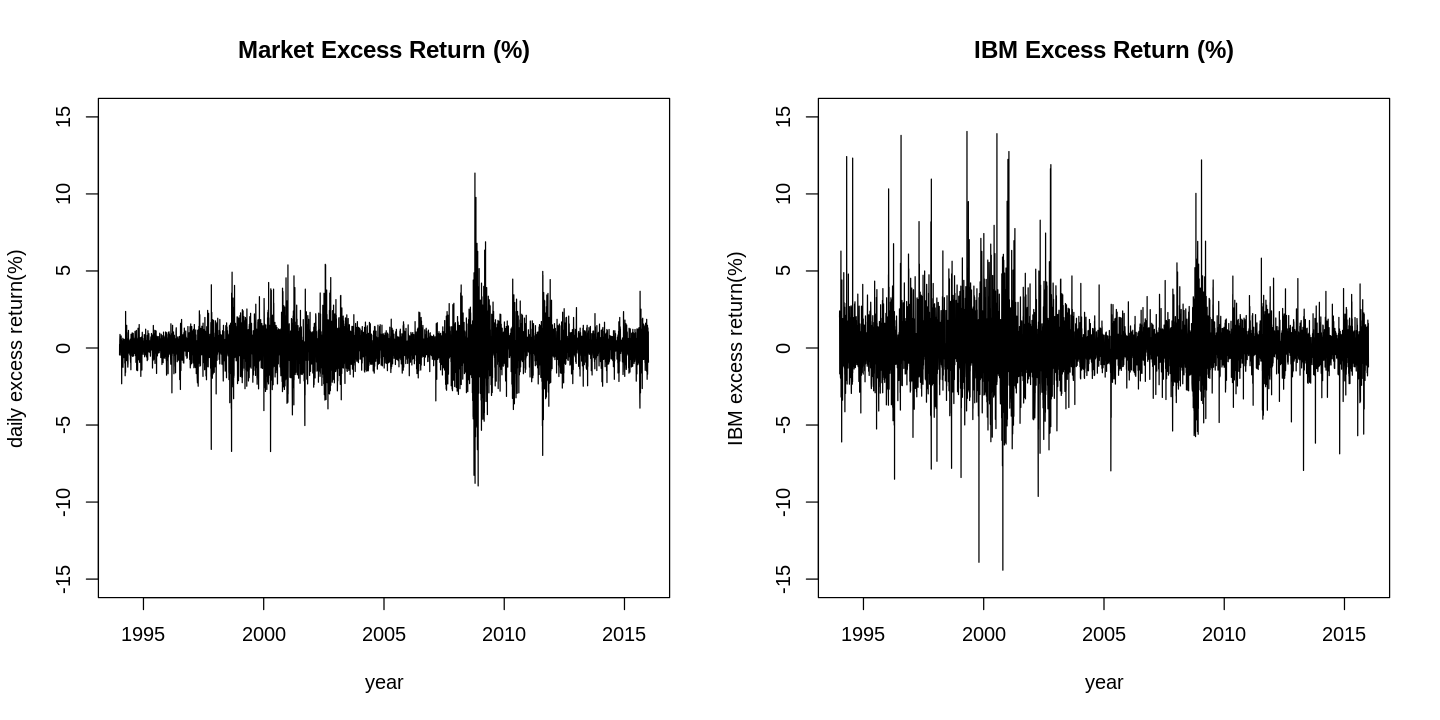

In [ ]:
# To Save

# Plot the Market Excess Return over time
jpeg(filename = "Case1_IBMEXERT.jpeg")
plot(Date, marketEXERT, type = "l",xlab = "year", ylab = "daily excess return(%)", main = "Market Excess Return (%)", ylim = c(-15,15))
dev.off()

# Plot the IBM Excess Return over time
jpeg(filename = "Case1_marketEXERT.jpeg")
plot(Date, IBMEXERT, type = "l",xlab = "year", ylab = "IBM excess return(%)", main = "IBM Excess Return (%)", ylim = c(-15,15))
dev.off()


# For Display

# Increase plot window size
options(repr.plot.width = 12, repr.plot.height = 6)

# Set up the plotting area for side-by-side plots
par(mfrow = c(1, 2))

# Plot the Market Excess Return over time
plot(Date, marketEXERT, type = "l",xlab = "year", ylab = "daily excess return(%)", main = "Market Excess Return (%)", ylim = c(-15,15))

# Plot the IBM Excess Return over time
plot(Date, IBMEXERT, type = "l",xlab = "year", ylab = "IBM excess return(%)", main = "IBM Excess Return (%)", ylim = c(-15,15))

png 
  2

png 
  2

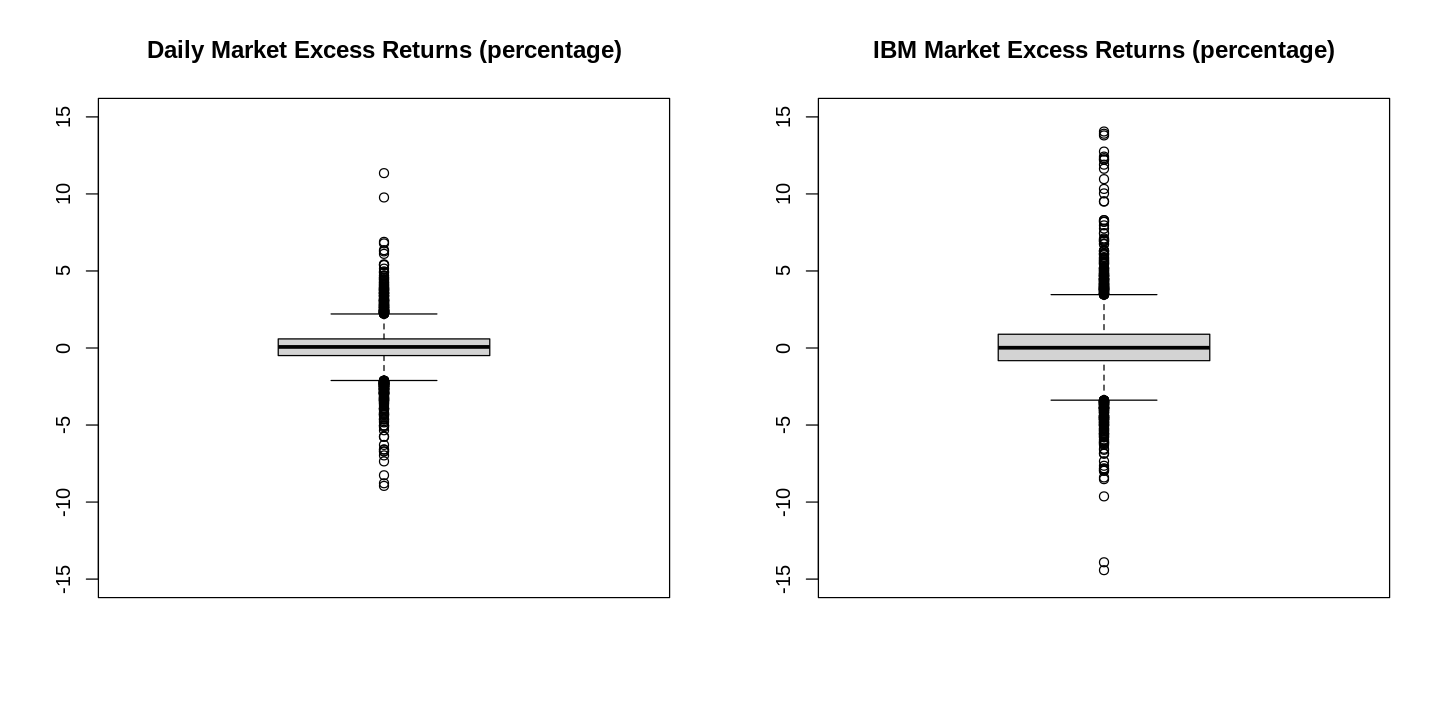

In [ ]:
# @title Box Plot

## To Save

### BoxPlot of Market Excess Return
jpeg(filename = "Case1_marketEXERT_boxplot.jpeg")
boxplot(marketEXERT, main = "Daily Market Excess Returns (percentage)", ylim = c(-15, 15))
dev.off()

### BoxPlot of IBM Excess Return over time
jpeg(filename = "Case1_ibmEXERT_boxplot.jpeg")
boxplot(IBMEXERT, main = "IBM Market Excess Returns (percentage)", ylim = c(-15, 15))
dev.off()


## For Display


### Increase plot window size
options(repr.plot.width = 12, repr.plot.height = 6)

### Set up the plotting area for side-by-side plots
par(mfrow = c(1, 2))

### Plot the first boxplot
boxplot(marketEXERT, main = "Daily Market Excess Returns (percentage)", ylim = c(-15, 15))

### Plot the second boxplot
boxplot(IBMEXERT, main = "IBM Market Excess Returns (percentage)", ylim = c(-15, 15))

For both the daily market excess returns and the daily IBM excess returns, summarize the data by computing the mean (annualized), standard deviatio (annualized), skewness, kurtosis, minimum, maximum, Sharpe Ratio (annualized), VaR and expected short fall. In the end, report the correlation between these two returns.

## Numerical Moments

In [ ]:
# Load statistics functions skewness & kurtosis
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
##Compute Descriptive Statistics for market excess return in daily percentage.

# compute the Mean
MKTmean<-mean(marketEXERT)*252

# compute the Square root
MKTsd<-sd(marketEXERT)*sqrt(252)

# compute the skewness
MKTskew<-skewness(marketEXERT)

# compute the kurtosis
MKTkurto<-kurtosis(marketEXERT)

# compute the min/max
MKTmin<-min(marketEXERT)
MKTmax<-max(marketEXERT)

print(paste('Average annualized Market Risk premium: ',MKTmean))
print(paste('Annualized Market volatility: ',MKTsd))

[1] "Average annualized Market returns:  7.89251263537906"
[1] "Annualized Market volatility:  18.836058117834"


In [ ]:
##Compute Descriptive Statistics for IBM excess return in daily percentage.

# compute the Mean
IBMmean<-mean(IBMEXERT)*252

# compute the Square root
IBMsd<-sd(IBMEXERT)*sqrt(252)

# compute the skewness
IBMskew<-skewness(IBMEXERT)

# compute the kurtosis
IBMkurto<-kurtosis(IBMEXERT)

# compute the min/max
IBMmin<-min(IBMEXERT)
IBMmax<-max(IBMEXERT)


print(paste('Average annualized IBM Risk premium: ',IBMmean))
print(paste('Annualized IBM volatility: ',IBMsd))

[1] "Average annualized IBM returns:  17.3819765226022"
[1] "Annualized IBM volatility:  28.8361971460491"


## Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. It was developed by Nobel laureate William F. Sharpe. The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.

$$
SR = \frac{Mean}{Standard Deviation}
$$




To annualize the mean, we multiply the mean by 252 because we are
assuming the returns are uncorrelated with each other and the return
over a year is the sum of the daily returns. We multiply the standard
deviation by $\sqrt{252}$ because annualization 252 should be applied to the variance. So the annualization of the ratio is $252/\sqrt{252} = \sqrt{252}$.

Youtube Video:

[![The Sharpe Ratio](https://img.youtube.com/vi/fWnyg0UeQkg/0.jpg)](https://www.youtube.com/watch?v=fWnyg0UeQkg)

## Sharpe Ratio

The **Sharpe Ratio** is indeed one of the most widely used metrics to evaluate the performance of an investment portfolio relative to its risk. It essentially measures the **risk-adjusted return**, helping investors understand how much extra return they are getting for the extra volatility (risk) they are taking on with an investment compared to a risk-free asset (such as government bonds).

### Formula:

$$
\text{Sharpe Ratio (SR)} = \frac{\text{Mean Return} - \text{Risk-free rate}}{\text{Standard deviation of returns}}
$$

### Components:
1. **Mean Return**: The average return of the investment over a period of time.
2. **Risk-Free Rate**: The return on an investment that is assumed to have zero risk (e.g., government bonds).
3. **Standard Deviation**: A measure of how much the investment’s returns vary from its average return (volatility or total risk).

### Annualized Sharpe Ratio:

To annualize the Sharpe Ratio for daily data, the following adjustments are made:

1. **Mean Return Annualization**: Since there are typically 252 trading days in a year, to annualize the daily mean return, multiply by 252.
   - Annualized Mean = Daily Mean × 252

2. **Standard Deviation Annualization**: To annualize the daily standard deviation, multiply it by the square root of 252 (because variance is proportional to time, and standard deviation is the square root of variance).
   - Annualized Standard Deviation = Daily Standard Deviation × √252

The formula for the **annualized Sharpe Ratio** becomes:

$$
\text{Annualized Sharpe Ratio} = \frac{\text{Mean Daily Return} \times 252}{\text{Daily Standard Deviation} \times \sqrt{252}}
$$

### Sharpe Ratio Interpretation:
- **Higher Sharpe Ratio**: Indicates better risk-adjusted returns. The investment is generating higher returns for each unit of risk.
- **Lower Sharpe Ratio**: Suggests that the investor may not be adequately compensated for the risk taken.

For example, if an investment portfolio has a Sharpe ratio of 1, it means that for every unit of risk taken, the portfolio is earning a unit of excess return above the risk-free rate. If the ratio is 2, the portfolio is earning two units of return for every unit of risk, and so on.

### Key Points:
- **Reward to Volatility**: The Sharpe ratio can be interpreted as the amount of extra return (reward) you are getting for each unit of volatility (risk).
- **Comparison**: Investors use the Sharpe ratio to compare different portfolios or investments. A higher Sharpe ratio implies a more efficient risk-return profile.

However, while useful, the Sharpe ratio has its limitations, especially in measuring risks in cases where returns are not normally distributed or when an investment has extreme tail risks. It works best when returns are reasonably symmetrically distributed.

In [ ]:
# Sharpe Ratio

MKTsr<-MKTmean/MKTsd
IBMsr<-IBMmean/IBMsd

print(paste('Sharpe Ratio (market), the average return in excess of the risk-free rate per unit of volatility is ', MKTsr))
print(paste('Sharpe Ratio (IBM), the average return in excess of the risk-free rate per unit of volatility is ', IBMsr))

[1] "Sharpe Ratio (market), the average return in excess of the risk-free rate per unit of volatility is  0.419010845369308"
[1] "Sharpe Ratio (IBM), the average return in excess of the risk-free rate per unit of volatility is  0.602783246159895"


## VaR and ES

**VaR**:

  It is the quantile of the return distribution. A 5% VaR means that 95% of the time returns will exceed the VaR and 5% will be worse.

**ES**:

  The expected shortfall is the conditional expectation of returns given that returns are in the 5% low percentile.

## VAR

**Value at Risk (VaR)** is a statistical measure used in finance to assess the level of financial risk within a portfolio, investment, or company over a specific time period. It estimates the maximum potential loss that could occur with a given probability due to market risk factors, such as price changes, interest rate movements, or other financial market fluctuations. VaR is commonly used by financial institutions, investment firms, and risk managers to quantify and control potential losses.

### Key Aspects of Value at Risk (VaR):

1. **Probability:** VaR provides the probability of losing a certain amount of value. For example, a 95% VaR of $1 million means there is a 5% chance that the loss will exceed $1 million.

2. **Time Horizon:** VaR is calculated over a specific time period, such as one day, one week, or one month, reflecting the investment’s exposure to risk during that time.

3. **Loss Amount:** VaR quantifies the potential loss in value of a portfolio or asset, helping investors understand the worst-case scenario they might face.

### Calculation Methods:

- **Historical Simulation:** Uses historical data to simulate potential losses based on past market conditions.

- **Calculate Value at Risk (VaR)**
  - To find the 90% VaR, we need to determine the value below which 90% of losses fall. This means sorting the losses and finding the cutoff point:
  - Sorted Losses (in ascending order): 5, 10, 15, 20, 25, 30, 40, 50, 60, 80.
  - Since we are calculating the 90% VaR, we look at the value at the 9th position from the bottom (or the 1st position from the top 10%):
  - 90% VaR = 60 thousand dollars.

This means that with 90% confidence, the loss will not exceed $60,000 in a day.


### Application of VaR:

- **Risk Management:** Helps financial institutions set risk limits and allocate capital accordingly.
- **Regulatory Compliance:** Banks use VaR to comply with regulatory capital requirements.
- **Performance Evaluation:** Assesses the risk-adjusted performance of portfolios or investment strategies.

### Assumption

- It assumes a normal distribution of risk return

While VaR is a widely used risk measurement tool, it has limitations, such as assuming normal distribution of returns and failing to predict extreme events ("black swan" events). It’s often used alongside other risk management tools to provide a comprehensive view of potential risks.

## ES

**Expected Shortfall (ES)**, also known as Conditional Value at Risk (CVaR), is a risk measure that estimates the expected loss of an investment or portfolio in the worst-case scenarios beyond a specified Value at Risk (VaR) threshold. In other words, while VaR tells us the maximum loss within a certain confidence level, Expected Shortfall provides the average loss that occurs when losses exceed the VaR limit. It is considered a more robust and coherent risk measure compared to VaR, especially for capturing tail risk (extreme losses).

### Key Aspects of Expected Shortfall (ES):

1. **Tail Risk Measurement:** Expected Shortfall focuses on the tail of the loss distribution, specifically targeting the extreme losses that occur beyond the VaR level. It provides insights into what happens when things go wrong beyond the typical scenarios considered by VaR.

2. **Average of Worst Losses:** It calculates the average loss of the worst-case outcomes (e.g., the worst 5% of cases if using a 95% confidence level). For example, if the 95% VaR is \\$1 million, the ES would provide the average loss of scenarios where losses are greater than \\$1 million.

3. **More Sensitive to Extreme Events:** Unlike VaR, which can ignore extreme outliers beyond a certain confidence level, ES accounts for these severe tail losses, making it a preferred measure for evaluating financial risk in extreme market conditions.

### Calculation of Expected Shortfall:

- **Mathematically:** ES is the expected value of losses given that the loss exceeds the VaR level. For a 95% confidence level, it averages the worst 5% of outcomes.

- **Methods:** Similar to VaR, ES can be computed using historical simulation, Monte Carlo simulation, or other advanced statistical methods that model the tail behavior of the loss distribution.

- **Calculate Expected Shortfall (ES)**
  - Expected Shortfall looks at the average of the losses that exceed the VaR level (in this case, losses greater than \$60,000).
  - From the sorted losses, the losses exceeding the 90% VaR (\$60,000) are:
    - Losses Exceeding VaR: 60, 80 (we include 60 because it’s on the threshold).
    - Expected Shortfall Calculation:
$ES = \frac{(60 + 80)}{2} = 70$ thousand dollars.

### Applications of Expected Shortfall:

1. **Risk Management:** Provides a more comprehensive measure of potential extreme losses, allowing for better risk control and capital allocation.
   
2. **Regulatory Use:** Regarded as a coherent risk measure by financial regulators, especially under stress testing scenarios.

3. **Portfolio Optimization:** Helps in designing portfolios with a better understanding of the potential for extreme losses.

### Advantages of Expected Shortfall Over VaR:

- **Sensitivity to Tail Risk:** ES captures the magnitude of tail risks better than VaR, which stops at a certain percentile and ignores the extent of further losses.
- **Coherence:** Unlike VaR, ES satisfies all properties of a coherent risk measure, including subadditivity, making it more reliable for aggregation of risks.

### Limitations:

- **Complexity in Calculation:** Estimating ES accurately, especially in non-normal distributions, can be computationally intensive.
- **Data Sensitivity:** ES is sensitive to the quality and quantity of historical data, particularly in extreme events.

Overall, Expected Shortfall provides a more comprehensive view of risk, particularly for financial institutions and investment managers focused on managing tail risks and extreme losses.

In [ ]:
# Value at Risk
MKTVaR <- quantile(marketEXERT, probs = c(0.05))
IBMVaR <- quantile(IBMEXERT, probs = c(0.05))

print(paste('Market VaR at 5% is ',MKTVaR))
print(paste('IBM VaR at 5% is ',IBMVaR))

[1] "Market VaR at 5% is  -1.8305"
[1] "IBM VaR at 5% is  -2.63304665555"


## Expected Shortfall

In [ ]:
# Loading PerformanceAnalytics
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following objects are masked from ‘package:e1071’:

    kurtosis, skewness


The following object is masked from ‘package:graphics’:

    legend




In [ ]:
# Compute Descriptive Statistics for IBM excess return in daily percentage.

# Market
MKT_raw<-marketEXERT/100
# Expected Shortfall
MKTES_raw<-ES(MKT_raw, p=.05,method="historical")
MKTES<-MKTES_raw*100

# IBM
IBM_raw<-IBMEXERT/100
# Expected Shortfall
IBMES_raw<-ES(IBM_raw, p=.05,method="historical")
IBMES<-IBMES_raw*100

print(paste('Market ES at 5% is ',MKTES))
print(paste('IBM ES at 5% is ',IBMES))

[1] "Market ES at 5% is  -2.80945848375451"
[1] "IBM ES at 5% is  -3.98031430492419"


In [ ]:
# Construct table

col_name <- c("Mean:", "Std:", "Skewness:", "Kurtosis:", "Sharpe Ratio","Value at Risk","Expected Shortfall","Correlation" )

## compute the correlation
IBMcMarket<-cor(IBMEXERT, marketEXERT)

# IBM
IBM <- c(IBMmean, IBMsd, IBMskew, IBMkurto, IBMsr, IBMVaR, IBMES, IBMcMarket)
# Market
Market <- c(MKTmean, MKTsd, MKTskew, MKTkurto, MKTsr,MKTVaR, MKTES, NA)

## Construct table
final_data_df <- data.frame(round(IBM,4), round(Market,4),row.names =col_name,check.names = TRUE)

# Preview
final_data_df

,round.IBM..4.,round.Market..4.
,<dbl>,<dbl>
Mean:,17.3820,7.8925
Std:,28.8362,18.8361
Skewness:,0.5800,-0.1169
Kurtosis:,8.0602,7.6395
Sharpe Ratio,0.6028,0.4190
Value at Risk,-2.6330,-1.8305
Expected Shortfall,-3.9803,-2.8095
Correlation,0.5956,NA


# Distribution

## Histogram plot

histogram plot (probability density function) for market excess returns and another histogram plot for IBM excess returns.

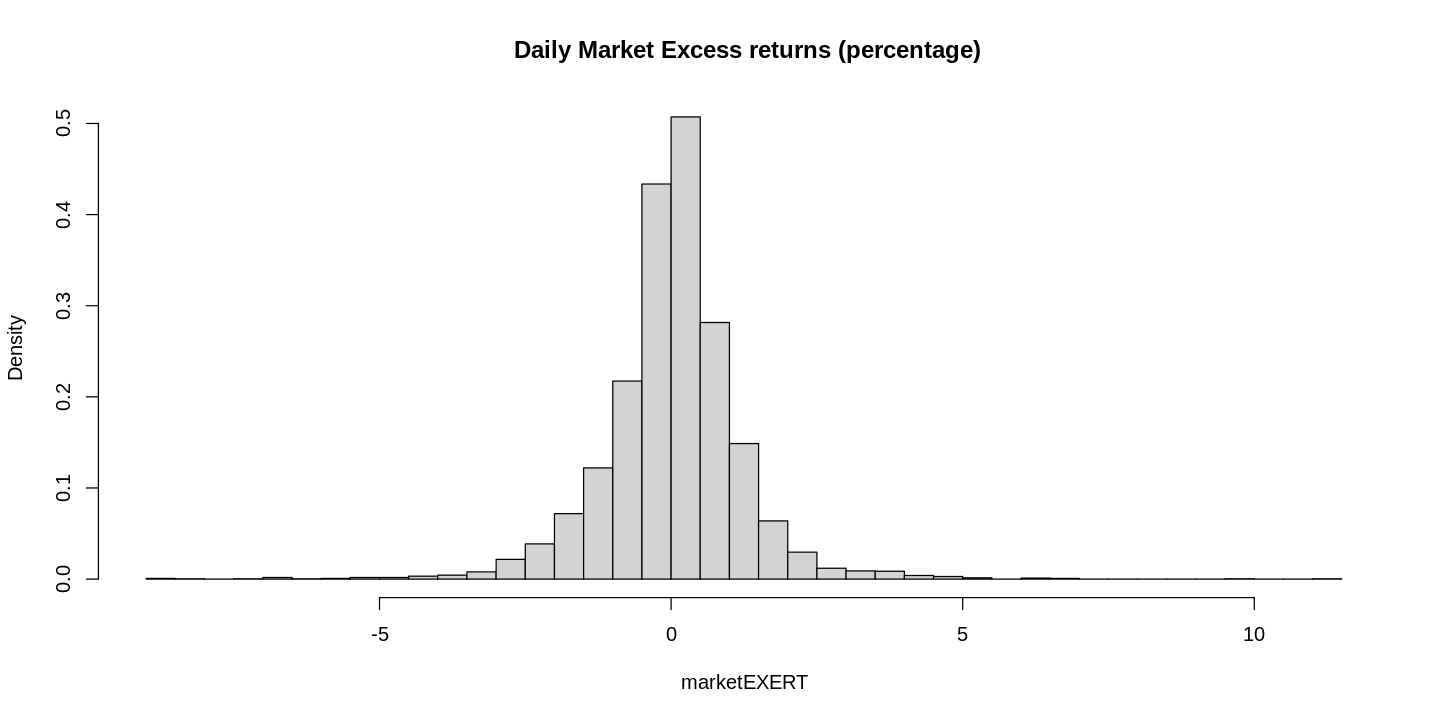

In [ ]:
# Histogram Plot for Market
hist(marketEXERT, main = " Daily Market Excess returns (percentage)", prob=TRUE, breaks = 50)

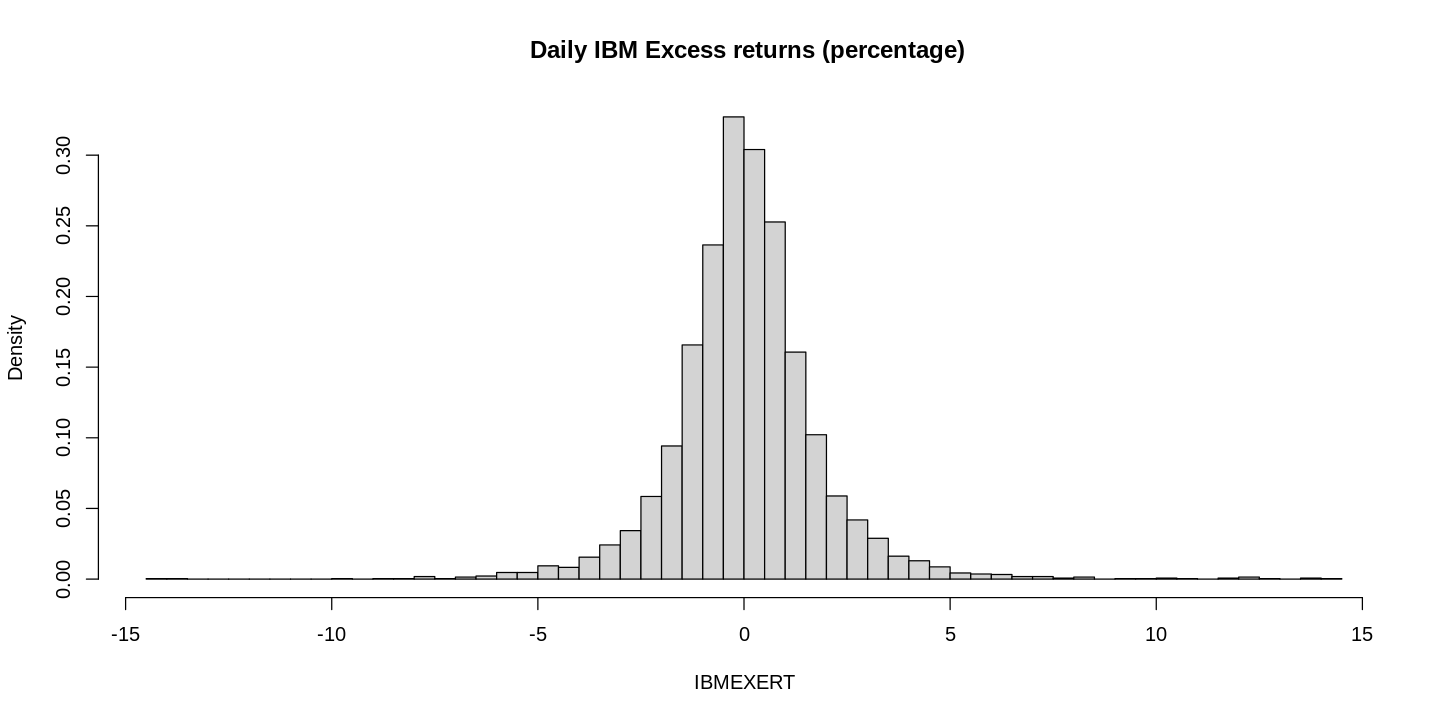

In [ ]:
# Histogram Plot for IBM
hist(IBMEXERT, main = " Daily IBM Excess returns (percentage)", prob=TRUE, breaks = 50)

**Hypothesis Test**

**Step 1**:
  
  Summarize the statement and the opposite of the statement. Choose the one with ”=” sign as the null hypothesis and the other one as the alternative hypothesis.
  - H0: Daily excess returns follow a normal distribution
  - H1: Daily excess returns don’t follow a normal distribution

**Step 2**:
  
  Calculate the test statistic and the p-value. Computer outputs usually provide test statistics, degree of freedom and p-value.

**Step 3**:

  Decision rule: Reject H0 if the probability of observing any value more extreme than the test statistic < α. This is because if the null were true, there would be only a small probability (p-value) that we could observe a value more extreme than the test statistic. If we do observe an extreme test statistic value, we don’t believe that the null is true, therefore we reject it.
  - $α$ is the maximum error you are willing to accept (is given).
  - p-value is the measure of evidence against the null hypothesis $H_0$.
    Smaller p-values indicate more evidence against H0.

**Step 4**:

  Conclusion. We either reject the null and in favor of the alternative. Or we can’t reject the null. We never say we accept the null.

## The Jarque-Bera Test:

  It is a type of Lagrange multiplier test, is a test for normality. Normality is one of the assumptions for many statistical tests, like the t test or F test; the Jarque-Bera test is usually run before one of these tests to confirm normality. It is usually used for large data sets, because other normality tests are not reliable when n is large (for example, Shapiro-Wilk isnt reliable with n more than 2,000).
  
  Specifically, the test matches the skewness and kurtosis of data to see if it matches a normal distribution. The data could take many forms, including: Time Series Data; Errors in a regression model and Data in a Vector.
  
  A normal distribution has a skew of zero (i.e. its perfectly symmetrical around the mean) and a kurtosis of three; kurtosis tells you how much data is in the tails and gives you an idea about how peaked the distribution is. Its not necessary to know the mean or the standard deviation for the data in order to run the test.

  $$
  JB = n * [{\frac{s^2}{6} + \frac{(k − 3)^2}{24}}] \quad (2.8)
  $$

  *Where:*
  - n is the sample size
  - s is the sample skewness coefficient
  - k is the kurtosis coefficient.

*The null hypothesis for the test is that the data is normally distributed; the alternate hypothesis is that the data does not come from a normal distribution.*

In [ ]:
# Loading tseries Package
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




	Jarque Bera Test

data:  IBMEXERT
X-squared = 15322, df = 2, p-value < 2.2e-16



	Jarque Bera Test

data:  marketEXERT
X-squared = 13498, df = 2, p-value < 2.2e-16


The p-values is less than 0.05, It indicate the distribution is less likely to be a normal distribution for both the cases.



**jarque.bera.test(x)** tests the null of normality for x using the JarqueBera test statistic. This test is a joint statistic using skewness and kurtosis coefficients. Missing values are not allowed.x is a numeric vector or time series. A list with class ”htest” containing the following components:
- **statistic** the value of the test statistic.
- **parameter** the degrees of freedom.
- **p.value** the p-value of the test.
- **method** a character string indicating what type of test was performed.
- **data.name** a character string giving the name of the data.

In [ ]:
# Jarque-Bera Test

jarque.bera.test(IBMEXERT)
jarque.bera.test(marketEXERT)


	Jarque Bera Test

data:  IBMEXERT
X-squared = 15322, df = 2, p-value < 2.2e-16



	Jarque Bera Test

data:  marketEXERT
X-squared = 13498, df = 2, p-value < 2.2e-16


The p-values is less than 0.05, It indicate the distribution is less likely to be a normal distribution for both the cases.


## The Lilliefors test

It is a test for normality. It is an improvement on the **Kolomogorov-Smirnov (K-S)** test correcting the K-S forsmall values at the tails of probability distributions and is therefore some-times called the K-S D test. Many statistical packages (like SPSS) combinethe two tests as a Lilliefors corrected K-S test.

Unlike the K-S test, Lilliefors can be used when you dont know the population mean or standard deviation. Essentially, the Lilliefors test is a K-Stest that allows you to estimate these parameters from your sample.

The *null* hypothesis ($H_0$) for the test is the data comes from a normaldistribution. The alternate hypothesis ($H_1$) is that the data doesnt comefrom a normal distribution. The test assumes that you have a random sample.If the test statistic is significantly large, you can reject the nullhypothesisand conclude that the data is not normal.

The Lilliefors test statistic is:
$$
D = max|F(x) − G(x)|
$$

where $F(x)$ is the empirical cdf of the sample data and $G(x)$ is the cdf of the hypothesized distribution with estimated parameters equal to the sample parameters.

In [ ]:
# Loading nortest
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**lillie.test(x)** performs the Lilliefors (Kolmogorov-Smirnov) test for the composite hypothesis of normality. x is a numeric vector of data values, the number of which must be greater than 4. Missing values are allowed. A list with class htest containing the following components:
- **statistic** the value of the Lilliefors (Kolomogorv-Smirnov) statistic.
- **p.value** the p-value for the test.
- **method** the character string Lilliefors (Kolmogorov-Smirnov) normality test.
- **data.name** a character string giving the name(s) of the data

In [ ]:
# Lilliefors test
lillie.test(IBMEXERT)
lillie.test(marketEXERT)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  IBMEXERT
D = 0.081205, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  marketEXERT
D = 0.084228, p-value < 2.2e-16


The p-values is less than 0.05, It indicate the distribution is less likely to be a normal distribution for both the cases.

### Citation:

1: Jarque, C. M., and A. K. Bera. ”A Test for Normality of Observations and Regression Residuals.” International Statistical Review. Vol. 55, No. 2, 1987, pp. 163172.

2: Lilliefors, H. W. ”On the Kolmogorov−Smirnov test for normality with mean and variance unknown.” Journal of the American Statistical Association. Vol. 62, 1967, pp. 399402.